In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import zipfile


In [38]:
zip_path = 'UCI HAR Dataset.zip'
extract_path = '.'

# Create a ZipFile object
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the specified path
    zip_ref.extractall(extract_path)

features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)
activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None)


In [39]:
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)

X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)


Missing values in training data: 0
Missing values in test data: 0


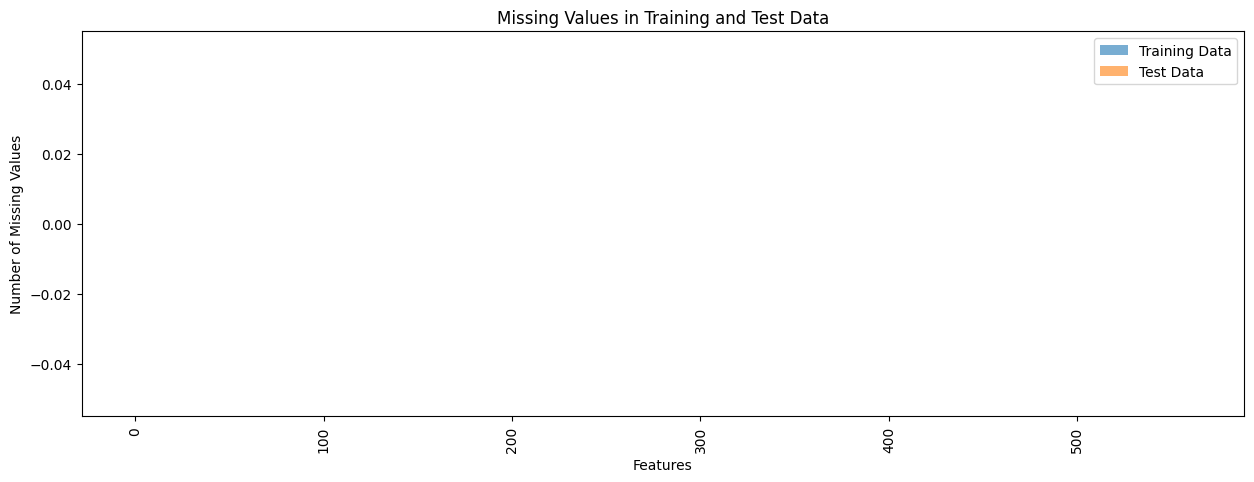

In [40]:
print("Missing values in training data:", X_train.isnull().sum().sum())
print("Missing values in test data:", X_test.isnull().sum().sum())

plt.figure(figsize=(15, 5))

plt.bar(missing_values_train.index, missing_values_train.values, label='Training Data', alpha=0.6)
plt.bar(missing_values_test.index, missing_values_test.values, label='Test Data', alpha=0.6)

plt.title('Missing Values in Training and Test Data')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [41]:
# Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [43]:
# K-Means
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_train_pca)
labels_kmeans_train = kmeans.predict(X_train_pca)
labels_kmeans_test = kmeans.predict(X_test_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_train_pca)
labels_dbscan_train = dbscan.labels_
labels_dbscan_test = dbscan.fit_predict(X_test_pca)


Silhouette Score for K-Means (Train): 0.47372038544622774
Silhouette Score for K-Means (Test): 0.4578653059282333
Silhouette Score for DBSCAN (Train): -0.3642397277937645
Silhouette Score for DBSCAN (Test): -0.4693269857397576


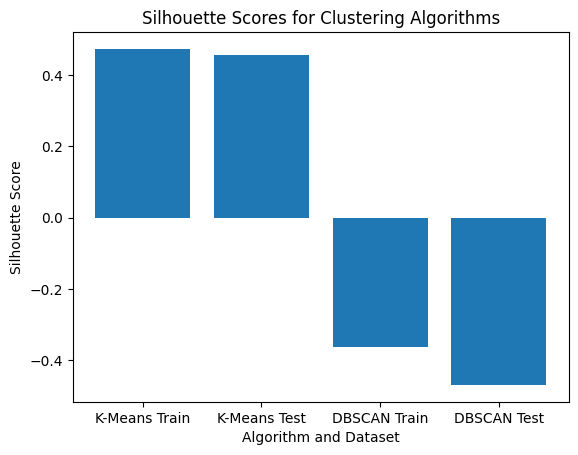

In [45]:
# Evaluation
score_kmeans_train = silhouette_score(X_train_pca, labels_kmeans_train)
score_kmeans_test = silhouette_score(X_test_pca, labels_kmeans_test)

score_dbscan_train = silhouette_score(X_train_pca, labels_dbscan_train)
score_dbscan_test = silhouette_score(X_test_pca, labels_dbscan_test)

print(f"Silhouette Score for K-Means (Train): {score_kmeans_train}")
print(f"Silhouette Score for K-Means (Test): {score_kmeans_test}")
print(f"Silhouette Score for DBSCAN (Train): {score_dbscan_train}")
print(f"Silhouette Score for DBSCAN (Test): {score_dbscan_test}")

# Define a function to plot silhouette scores
def plot_silhouette_scores(score_kmeans_train, score_kmeans_test, score_dbscan_train, score_dbscan_test):

    labels = ['K-Means Train', 'K-Means Test', 'DBSCAN Train', 'DBSCAN Test']
    scores = [score_kmeans_train, score_kmeans_test, score_dbscan_train, score_dbscan_test]

    x = range(len(labels))

    plt.bar(x, scores, tick_label=labels)
    plt.xlabel('Algorithm and Dataset')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Clustering Algorithms')
    plt.show()

plot_silhouette_scores(score_kmeans_train, score_kmeans_test, score_dbscan_train, score_dbscan_test)



In [46]:
def print_clusters(X, labels, title):
    unique_labels = np.unique(labels)
    print(title)

    for label in unique_labels:
        count = np.sum(labels == label)
        if label == -1:
            print(f"Noise points: {count}")
        else:
            print(f"Cluster {label}: {count} points")
#KMeans (Train)
print_clusters(X_train_pca, labels_kmeans_train, 'K-Means Clustering (Train)')
print("\n")

#KMeans (Test)
print_clusters(X_test_pca, labels_kmeans_test, 'K-Means Clustering (Test)')
print("\n")

#DBSCAN (Train)
print_clusters(X_train_pca, labels_dbscan_train, 'DBSCAN Clustering (Train)')
print("\n")

#DBSCAN (Test)
print_clusters(X_test_pca, labels_dbscan_test, 'DBSCAN Clustering (Test)')
print("\n")


K-Means Clustering (Train)
Cluster 0: 2544 points
Cluster 1: 1304 points
Cluster 2: 1491 points
Cluster 3: 1065 points
Cluster 4: 785 points
Cluster 5: 163 points


K-Means Clustering (Test)
Cluster 0: 953 points
Cluster 1: 525 points
Cluster 2: 597 points
Cluster 3: 533 points
Cluster 4: 318 points
Cluster 5: 21 points


DBSCAN Clustering (Train)
Noise points: 2170
Cluster 0: 3498 points
Cluster 1: 8 points
Cluster 2: 34 points
Cluster 3: 5 points
Cluster 4: 36 points
Cluster 5: 12 points
Cluster 6: 10 points
Cluster 7: 29 points
Cluster 8: 12 points
Cluster 9: 9 points
Cluster 10: 22 points
Cluster 11: 16 points
Cluster 12: 10 points
Cluster 13: 5 points
Cluster 14: 10 points
Cluster 15: 4 points
Cluster 16: 19 points
Cluster 17: 19 points
Cluster 18: 11 points
Cluster 19: 5 points
Cluster 20: 14 points
Cluster 21: 11 points
Cluster 22: 68 points
Cluster 23: 37 points
Cluster 24: 5 points
Cluster 25: 9 points
Cluster 26: 2 points
Cluster 27: 7 points
Cluster 28: 9 points
Cluster 29: 

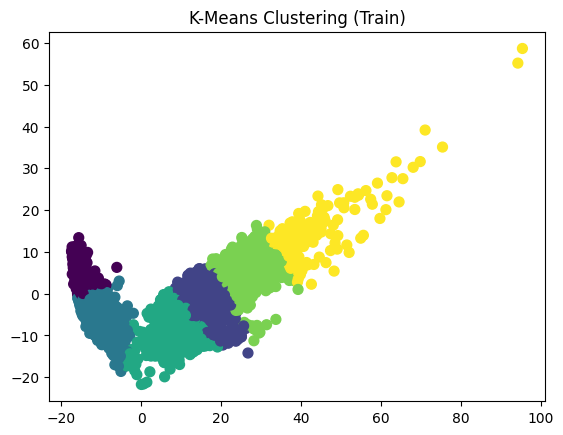

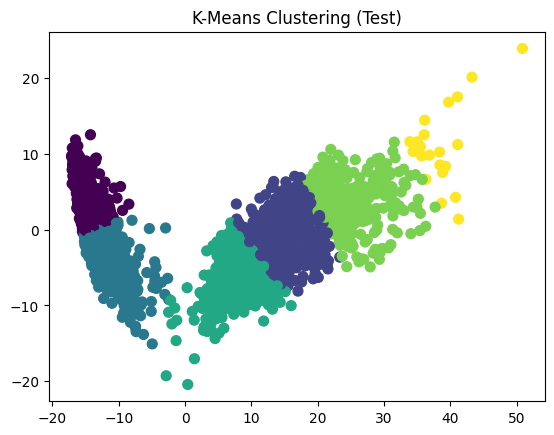

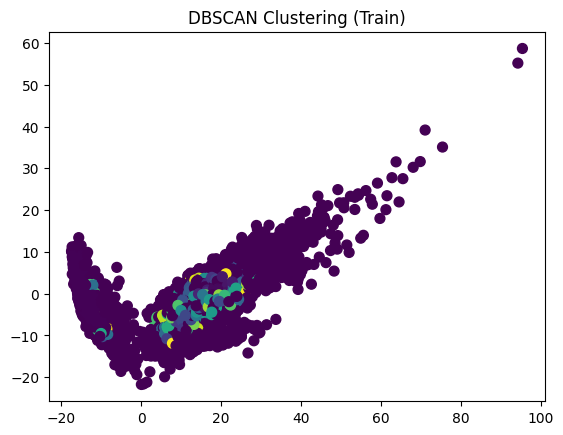

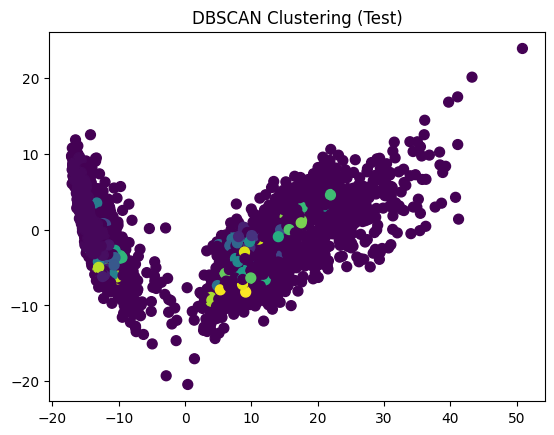

In [47]:
# Visualization for KMeans (Train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels_kmeans_train, s=50, cmap='viridis')
plt.title('K-Means Clustering (Train)')
plt.show()

# Visualization for KMeans (Test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=labels_kmeans_test, s=50, cmap='viridis')
plt.title('K-Means Clustering (Test)')
plt.show()

# Visualization for DBSCAN (Train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels_dbscan_train, s=50, cmap='viridis')
plt.title('DBSCAN Clustering (Train)')
plt.show()

# Visualization for DBSCAN (Test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=labels_dbscan_test, s=50, cmap='viridis')
plt.title('DBSCAN Clustering (Test)')
plt.show()
